In [83]:
import pandas as pd
import numpy as np
import joblib
#from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px

In [84]:
df=pd.read_csv("credit_train.csv")

In [85]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [86]:
for i in df.columns:
    if df[i].dtypes == object:
        print(i)

Loan ID
Customer ID
Loan Status
Term
Years in current job
Home Ownership
Purpose


In [87]:
for i in df.columns:
    if df[i].dtypes == float:
        print(i)

Current Loan Amount
Credit Score
Annual Income
Monthly Debt
Years of Credit History
Months since last delinquent
Number of Open Accounts
Number of Credit Problems
Current Credit Balance
Maximum Open Credit
Bankruptcies
Tax Liens


In [88]:
print(df['Loan Status'].unique())
print(df['Loan Status'].value_counts())
print(df['Term'].unique())
print(df['Term'].value_counts())
print(df['Years in current job'].unique())
print(df['Years in current job'].value_counts())
print(df['Home Ownership'].unique())
print(df['Home Ownership'].value_counts())
print(df['Purpose'].unique())
print(df['Purpose'].value_counts())

['Fully Paid' 'Charged Off' nan]
Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64
['Short Term' 'Long Term' nan]
Short Term    72208
Long Term     27792
Name: Term, dtype: int64
['8 years' '10+ years' '3 years' '5 years' '< 1 year' '2 years' '4 years'
 '9 years' '7 years' '1 year' nan '6 years']
10+ years    31121
2 years       9134
3 years       8169
< 1 year      8164
5 years       6787
1 year        6460
4 years       6143
6 years       5686
7 years       5577
8 years       4582
9 years       3955
Name: Years in current job, dtype: int64
['Home Mortgage' 'Own Home' 'Rent' 'HaveMortgage' nan]
Home Mortgage    48410
Rent             42194
Own Home          9182
HaveMortgage       214
Name: Home Ownership, dtype: int64
['Home Improvements' 'Debt Consolidation' 'Buy House' 'other'
 'Business Loan' 'Buy a Car' 'major_purchase' 'Take a Trip' 'Other'
 'small_business' 'Medical Bills' 'wedding' 'vacation'
 'Educational Expenses' 'moving' 'renewable_energy' nan]
Debt

In [89]:
values_Loan=df["Loan Status"].value_counts()#Count the values frequency
names_Loan=df["Loan Status"].unique().tolist()#Creating the unique value Labels
names_Loan.remove(names_Loan[2])
values_Term=df['Term'].value_counts()#Count the values frequency
names_Term=df['Term'].unique().tolist()#Creating the unique value Labels
names_Term.remove(names_Term[2])
values_Ownership=df['Home Ownership'].value_counts()#Count the values frequency
names_Ownership=df['Home Ownership'].unique().tolist()#Creating the unique value Labels
names_Ownership.remove(names_Ownership[-1])
values_Years_in_current_job=df['Years in current job'].value_counts()#Count the values frequency
names_Years_in_current_job=df['Years in current job'].unique().tolist()#Creating the unique value Labels
names_Years_in_current_job.remove(names_Years_in_current_job[-1])
values_Purpose=df['Purpose'].value_counts()#Count the values frequency
names_Purpose=df['Purpose'].unique().tolist()#Creating the unique value Labels
names_Purpose.remove(names_Purpose[-1])

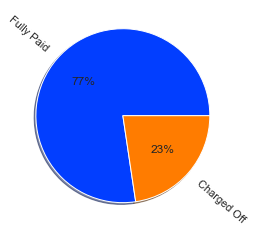

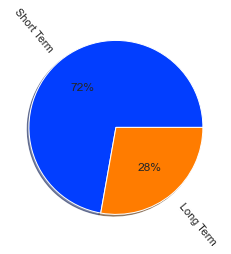

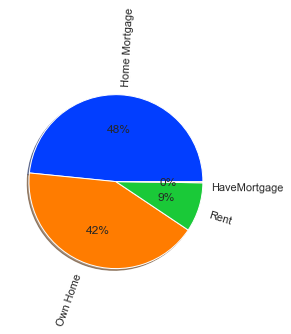

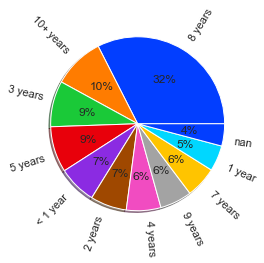

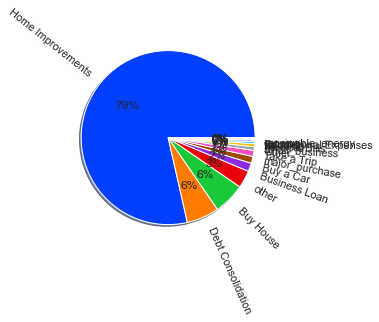

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = sns.color_palette('bright')
plt.pie(values_Loan, labels=names_Loan, colors=colors,
        autopct='%.0f%%', shadow=True, rotatelabels='true')
plt.show()
plt.pie(values_Term, labels=names_Term, colors=colors,
        autopct='%.0f%%', shadow=True, rotatelabels='true')
plt.show()
plt.pie(values_Ownership, labels=names_Ownership, colors=colors,
        autopct='%.0f%%', shadow=True, rotatelabels='true')
plt.show()
plt.pie(values_Years_in_current_job, labels=names_Years_in_current_job, colors=colors,
        autopct='%.0f%%', shadow=True, rotatelabels='true')
plt.show()
plt.pie(values_Purpose, labels=names_Purpose, colors=colors,
        autopct='%.0f%%', shadow=True, rotatelabels='true')
plt.show()

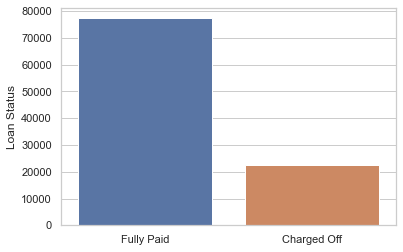

In [91]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=names_Loan, y=values_Loan)
plt.show()


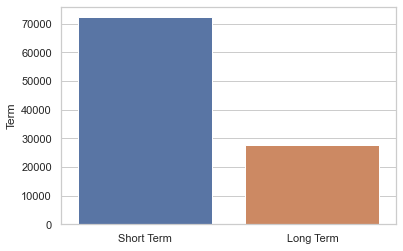

In [92]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=names_Term, y=values_Term)

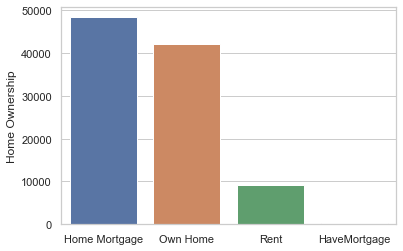

In [93]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=names_Ownership, y=values_Ownership)

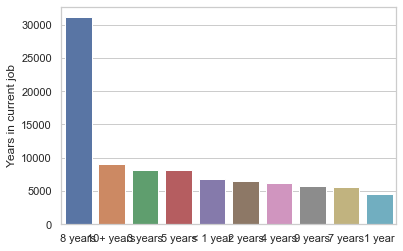

In [94]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=names_Years_in_current_job, y=values_Years_in_current_job) 

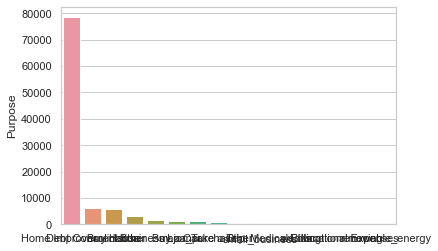

In [95]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=names_Purpose, y=values_Purpose)

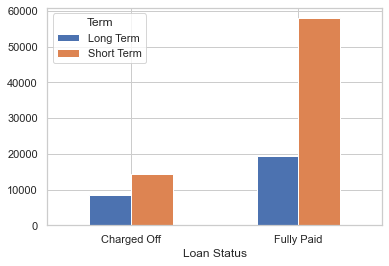

In [96]:
# Creating crosstab
crosstb1 = pd.crosstab(df['Loan Status'], df['Term']) 
# Creating barplot
barplot = crosstb1.plot.bar(rot=0)

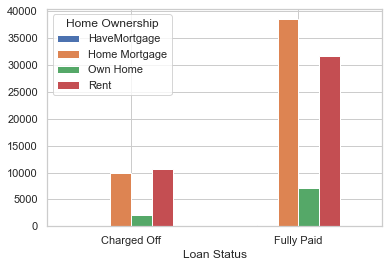

In [97]:
# Creating crosstab
crosstb1 = pd.crosstab(df['Loan Status'],df['Home Ownership']) 
# Creating barplot
barplot = crosstb1.plot.bar(rot=0)

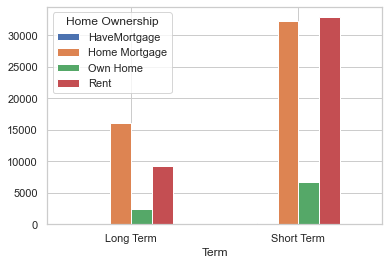

In [98]:
df# Creating crosstab
crosstb1 = pd.crosstab(df['Term'],df['Home Ownership']) 
# Creating barplot
barplot = crosstb1.plot.bar(rot=0) 

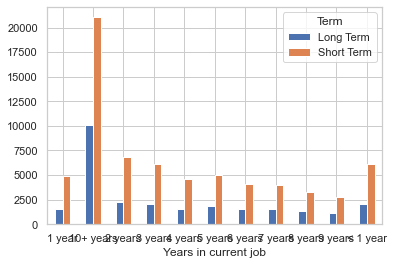

In [99]:
crosstb1 = pd.crosstab(df['Years in current job'],df['Term']) 
# Creating barplot
barplot = crosstb1.plot.bar(rot=0) 

In [100]:
tree_test=df["Loan Status"]

In [101]:
def getnumber(status):
    if(status=="Fully Paid"):
        return 1
    else:
        return 0

In [102]:
def getconv(status):
    if(status=="Own Home"):
        return 1
    else:
        return 0

In [103]:
def getterm(status):
    if(status=="Long Term"):
        return 1
    else:
        return 0

In [43]:
df["Home Ownership"]=df["Home Ownership"].apply(getconv)
df["Term"]=df["Term"].apply(getterm)

In [44]:
#del df["Years in current job"]
del df["Purpose"]

In [45]:
df["Years"]=df["Years in current job"].str.extract('(\d+)')

In [46]:
df.head(3)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Years
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,0,709.0,1167493.0,8 years,0,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,8
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,0,NaN,NaN,10+ years,0,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,10
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,0,741.0,2231892.0,8 years,1,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,8


In [47]:
df.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                                0
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                      0
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
Years                            4736
dtype: int64

In [48]:
del df["Customer ID"]
dfp=df.dropna(subset=['Loan ID'])
dfa=dfp.dropna(subset=['Years'])
del dfa["Loan ID"]
del dfa["Years in current job"]

In [49]:
dfa["Years"].astype(str).astype(int)

0         8
1        10
2         8
3         3
4         5
         ..
99994     1
99995     7
99996     1
99997     6
99998     9
Name: Years, Length: 95778, dtype: int32

In [50]:
dfa.isnull().sum()

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    18344
Annual Income                   18344
Home Ownership                      0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    50898
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
Years                               0
dtype: int64

In [51]:
dfa.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Home Ownership,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Years
0,Fully Paid,445412.0,0,709.0,1167493.0,0,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,8
1,Fully Paid,262328.0,0,NaN,NaN,0,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,10
2,Fully Paid,99999999.0,0,741.0,2231892.0,1,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,8
3,Fully Paid,347666.0,1,721.0,806949.0,1,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0,3
4,Fully Paid,176220.0,0,NaN,NaN,0,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0,5


In [52]:
meaninc= dfa["Credit Score"].mean()
meanann= dfa["Annual Income"].mean()
meanmth= dfa["Months since last delinquent"].mean()
meanbnk= dfa["Bankruptcies"].mean()
meanlie= dfa["Tax Liens"].mean()
meancred=dfa["Maximum Open Credit"].mean()

In [53]:
dfa["Credit Score"]=dfa["Credit Score"].fillna(value=meaninc)
dfa["Annual Income"]=dfa["Annual Income"].fillna(value=meanann)
dfa["Months since last delinquent"]=dfa["Months since last delinquent"].fillna(value=meanmth)
dfa["Bankruptcies"]=dfa["Bankruptcies"].fillna(value=meanbnk)
dfa["Tax Liens"]=dfa["Tax Liens"].fillna(value=meanlie)
dfa["Maximum Open Credit"]=dfa["Maximum Open Credit"].fillna(value=meancred)
dfa.isnull().sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_6032\2415589360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa["Credit Score"]=dfa["Credit Score"].fillna(value=meaninc)
C:\Users\HP\AppData\Local\Temp\ipykernel_6032\2415589360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa["Annual Income"]=dfa["Annual Income"].fillna(value=meanann)
C:\Users\HP\AppData\Local\Temp\ipykernel_6032\2415589360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Home Ownership                  0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
Years                           0
dtype: int64

In [54]:
dfa.head(3)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Home Ownership,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Years
0,Fully Paid,445412.0,0,709.000000,1.167493e+06,0,5214.74,17.2,34.811074,6.0,1.0,228190.0,416746.0,1.0,0.0,8
1,Fully Paid,262328.0,0,1071.957861,1.399077e+06,0,33295.98,21.1,8.000000,35.0,0.0,229976.0,850784.0,0.0,0.0,10
2,Fully Paid,99999999.0,0,741.000000,2.231892e+06,1,29200.53,14.9,29.000000,18.0,1.0,297996.0,750090.0,0.0,0.0,8


In [55]:
train_data=dfa
dfa["Loan Status"]=dfa["Loan Status"].apply(getnumber)
y_train=dfa["Loan Status"]
del dfa["Loan Status"]

C:\Users\HP\AppData\Local\Temp\ipykernel_6032\4257994506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa["Loan Status"]=dfa["Loan Status"].apply(getnumber)


In [56]:
dfa.head(10)

,Current Loan Amount,Term,Credit Score,Annual Income,Home Ownership,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Years
0,445412.0,0,709.000000,1.167493e+06,0,5214.74,17.2,34.811074,6.0,1.0,228190.0,416746.0,1.0,0.0,8
1,262328.0,0,1071.957861,1.399077e+06,0,33295.98,21.1,8.000000,35.0,0.0,229976.0,850784.0,0.0,0.0,10
2,99999999.0,0,741.000000,2.231892e+06,1,29200.53,14.9,29.000000,18.0,1.0,297996.0,750090.0,0.0,0.0,8
3,347666.0,1,721.000000,8.069490e+05,1,8741.90,12.0,34.811074,9.0,0.0,256329.0,386958.0,0.0,0.0,3
4,176220.0,0,1071.957861,1.399077e+06,0,20639.70,6.1,34.811074,15.0,0.0,253460.0,427174.0,0.0,0.0,5
5,206602.0,0,7290.000000,8.968570e+05,0,16367.74,17.3,34.811074,6.0,0.0,215308.0,272448.0,0.0,0.0,10
6,217646.0,0,730.000000,1.184194e+06,0,10855.08,19.6,10.000000,13.0,1.0,122170.0,272052.0,1.0,0.0,1
7,648714.0,1,1071.957861,1.399077e+06,0,14806.13,8.2,8.000000,15.0,0.0,193306.0,864204.0,0.0,0.0,1
8,548746.0,0,678.000000,2.559110e+06,0,18660.28,22.6,33.000000,4.0,0.0,437171.0,555038.0,0.0,0.0,2
9,215952.0,0,739.000000,1.454735e+06,0,39277.75,13.9,34.811074,20.0,0.0,669560.0,1021460.0,0.0,0.0,1


In [57]:
dft=pd.read_csv("credit_test.csv")

In [58]:
dft.head(10)

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0
5,a4957169-d809-44cc-847b-975400bc8d11,6878d414-6a22-4712-ae43-9b3f798e463a,202928.0,Short Term,741.0,760380.0,1 year,Rent,Debt Consolidation,6526.69,13.8,NaN,6.0,0.0,258647.0,476872.0,0.0,0.0
6,43467302-94fe-494b-b52f-3fd891fea71c,48113a98-a4a0-4956-b57d-f0ce344826fb,621786.0,Long Term,733.0,1783606.0,10+ years,Home Mortgage,Debt Consolidation,36563.98,15.3,NaN,42.0,0.0,281599.0,1449162.0,0.0,0.0
7,930c7cb3-6086-434a-9547-3ed41c181552,19941661-98e2-4800-93c9-a0e92057c813,266794.0,Long Term,NaN,NaN,< 1 year,Own Home,Debt Consolidation,12336.89,5.8,NaN,9.0,0.0,233206.0,342232.0,0.0,0.0
8,0b2f1b66-741e-4e37-a929-99926cdc9e9a,6a1adeda-079b-49e5-ac7c-91828f2806a0,202466.0,Short Term,736.0,1068617.0,5 years,Rent,Debt Consolidation,18745.21,20.5,NaN,2.0,0.0,0.0,0.0,0.0,0.0
9,d08f3a5e-93df-40e7-bdd8-cba59180bddf,4080a828-a61a-4f04-a627-397f4319500c,266288.0,Long Term,683.0,2031518.0,2 years,Rent,Debt Consolidation,12443.10,24.4,56.0,8.0,2.0,31445.0,251130.0,2.0,0.0


In [59]:
dft["Home Ownership"]=dft["Home Ownership"].apply(getconv)
dft["Term"]=dft["Term"].apply(getterm)

In [60]:
dft["Home Ownership"].apply(getconv)
dfk=dft.dropna(subset=['Loan ID'])
dfk["Years"]=dfk["Years in current job"].str.extract('(\d+)')
dfs=dfk.dropna(subset=['Years'])
dfs["Years"].astype(str).astype(int)
meaninc= dfs["Credit Score"].mean()
meanann= dfs["Annual Income"].mean()
meanmth= dfs["Months since last delinquent"].mean()
meanbnk= dfs["Bankruptcies"].mean()
meanlie= dfs["Tax Liens"].mean()
meancred=dfs["Maximum Open Credit"].mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_6032\881232040.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfk["Years"]=dfk["Years in current job"].str.extract('(\d+)')


In [61]:
dfs["Credit Score"]=dfs["Credit Score"].fillna(value=meaninc)
dfs["Annual Income"]=dfs["Annual Income"].fillna(value=meanann)
dfs["Months since last delinquent"]=dfs["Months since last delinquent"].fillna(value=meanmth)
dfs["Bankruptcies"]=dfs["Bankruptcies"].fillna(value=meanbnk)
dfs["Tax Liens"]=dfs["Tax Liens"].fillna(value=meanlie)
dfs["Maximum Open Credit"]=dfs["Maximum Open Credit"].fillna(value=meancred)
dfs.isnull().sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_6032\359555771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs["Credit Score"]=dfs["Credit Score"].fillna(value=meaninc)
C:\Users\HP\AppData\Local\Temp\ipykernel_6032\359555771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs["Annual Income"]=dfs["Annual Income"].fillna(value=meanann)
C:\Users\HP\AppData\Local\Temp\ipykernel_6032\359555771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

Loan ID                         0
Customer ID                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
Years                           0
dtype: int64

In [62]:
del dfs["Years in current job"]
del dfs["Purpose"]
del dfs["Loan ID"]
del dfs["Customer ID"]

In [63]:
final=0.79832
fsk=0.7867

In [64]:
dfs.head(10)

,Current Loan Amount,Term,Credit Score,Annual Income,Home Ownership,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Years
0,611314.0,0,747.000000,2.074116e+06,0,42000.83,21.8,34.943925,9.0,0.0,621908.0,1058970.0,0.0,0.0,10
1,266662.0,0,734.000000,1.919190e+06,0,36624.40,19.4,34.943925,11.0,0.0,679573.0,904442.0,0.0,0.0,10
2,153494.0,0,709.000000,8.711120e+05,0,8391.73,12.5,10.000000,10.0,0.0,38532.0,388036.0,0.0,0.0,2
3,176242.0,0,727.000000,7.800830e+05,0,16771.87,16.5,27.000000,16.0,1.0,156940.0,531322.0,1.0,0.0,10
4,321992.0,0,744.000000,1.761148e+06,0,39478.77,26.0,44.000000,14.0,0.0,359765.0,468072.0,0.0,0.0,10
5,202928.0,0,741.000000,7.603800e+05,0,6526.69,13.8,34.943925,6.0,0.0,258647.0,476872.0,0.0,0.0,1
6,621786.0,1,733.000000,1.783606e+06,0,36563.98,15.3,34.943925,42.0,0.0,281599.0,1449162.0,0.0,0.0,10
7,266794.0,1,1078.938387,1.386661e+06,1,12336.89,5.8,34.943925,9.0,0.0,233206.0,342232.0,0.0,0.0,1
8,202466.0,0,736.000000,1.068617e+06,0,18745.21,20.5,34.943925,2.0,0.0,0.0,0.0,0.0,0.0,5
9,266288.0,1,683.000000,2.031518e+06,0,12443.10,24.4,56.000000,8.0,2.0,31445.0,251130.0,2.0,0.0,2


In [65]:
###############  ANALYTICS AND COMPARISONS ##########################

In [66]:
#################   Multi Layer Perceptron ##################################

In [67]:
from sklearn.neural_network import MLPClassifier

In [68]:
clf=MLPClassifier(hidden_layer_sizes=(20,),max_iter=3000)
clf.fit(dfa,y_train)

MLPClassifier(hidden_layer_sizes=(20,), max_iter=3000)

In [69]:
clf.score(dfa,y_train)

0.591545031218025

In [70]:
Final=clf.predict(dfs)

In [71]:
clf.score(dfs,Final)

1.0

In [72]:
########   Accuracy-100% ####################

In [73]:
#####################RanDom Forest#########################

In [74]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
seed = 7
num_trees = 100
max_features = 3
kfold = model_selection.KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model,dfa,y_train, cv=kfold)
print(results.mean())

0.8224122161108784


In [75]:
########################### DECISION TREE ############################

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import pydotplus

In [77]:
#X_train,X_test,y_train,y_test=train_test_split(dfa,y,random_state=1)
clf=DecisionTreeClassifier()
clf.fit(dfa,y_train)

DecisionTreeClassifier()

In [78]:
final=clf.score(dfa,y_train)

In [79]:
print(final)

1.0


In [80]:
Final=clf.predict(dfs)

In [81]:
fsk=clf.score(dfs,Final)

In [82]:
print(fsk)

1.0
